In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/media/shuvendu/Projects/Datasets/KDEF_and_AKDEF/data/train'
test_dir ='/media/shuvendu/Projects/Datasets/KDEF_and_AKDEF/data/test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=32
)

Found 3918 images belonging to 7 classes.
Found 980 images belonging to 7 classes.


## Try using pretrined model

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 27,563,847
Trainable params: 27,563,847
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=10, 
                              validation_data=validation_generator, 
                              validation_steps=30)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/10
125/125 [==============================] - 98s - loss: 0.7391 - categorical_accuracy: 0.7165 - val_loss: 0.7383 - val_categorical_accuracy: 0.7110
Epoch 2/10
125/125 [==============================] - 97s - loss: 0.5080 - categorical_accuracy: 0.8099 - val_loss: 0.5878 - val_categorical_accuracy: 0.7869
Epoch 3/10
125/125 [==============================] - 98s - loss: 0.4125 - categorical_accuracy: 0.8489 - val_loss: 0.4989 - val_categorical_accuracy: 0.8154
Epoch 4/10
125/125 [==============================] - 99s - loss: 0.2947 - categorical_accuracy: 0.8958 - val_loss: 0.4137 - val_categorical_accuracy: 0.8502
Epoch 5/10
125/125 [==============================] - 98s - loss: 0.2172 - categorical_accuracy: 0.9299 - val_loss: 0.3401 - val_categorical_accuracy: 0.8745
Epoch 6/10
125/125 [==============================] - 101s - loss: 0.1651 - categorical_accuracy: 0.9444 - val_loss: 0.4673 - val_categor

In [9]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [10]:
model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=30)

Epoch 1/30
125/125 [==============================] - 43s - loss: 0.0361 - categorical_accuracy: 0.9870 - val_loss: 0.4405 - val_categorical_accuracy: 0.8875
Epoch 2/30
125/125 [==============================] - 42s - loss: 0.0303 - categorical_accuracy: 0.9885 - val_loss: 0.4188 - val_categorical_accuracy: 0.8998
Epoch 3/30
125/125 [==============================] - 42s - loss: 0.0184 - categorical_accuracy: 0.9950 - val_loss: 0.3898 - val_categorical_accuracy: 0.8987
Epoch 4/30
125/125 [==============================] - 42s - loss: 0.0070 - categorical_accuracy: 0.9977 - val_loss: 0.4705 - val_categorical_accuracy: 0.9019
Epoch 5/30
125/125 [==============================] - 42s - loss: 0.0082 - categorical_accuracy: 0.9967 - val_loss: 0.4465 - val_categorical_accuracy: 0.9124
Epoch 6/30
125/125 [==============================] - 42s - loss: 0.0069 - categorical_accuracy: 0.9977 - val_loss: 0.4280 - val_categorical_accuracy: 0.9146
Epoch 7/30
125/125 [==============================] 

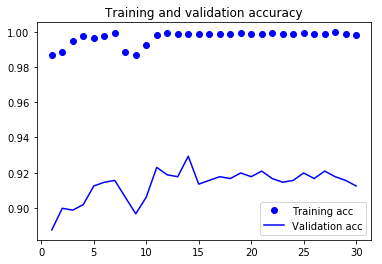

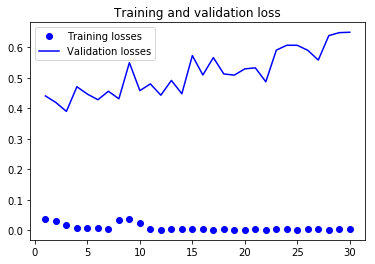

In [11]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model.save('fully_trained_model.h5')